Student Name: Chelliah Kanthanathan
Student ID: 18263003

In [248]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import math
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
import pandas as pd
#import seaborn as sns
from sklearn import model_selection
from sklearn.utils import shuffle
import random

# Task 1 - Load the data set

In [249]:
df = pd.read_csv('./bank_et2.csv')

# Print the first five rows
df.head(5)

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,0,32.0,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,1,39.0,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,2,59.0,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,3,47.0,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,4,54.0,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [250]:
# Print the last five rows
df.tail(5)

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,1995,20.0,student,single,NaN,no,2785,-2.170524,1.081071,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,1996,28.0,admin.,single,secondary,no,127,0.811788,1.134496,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,1997,81.0,retired,married,primary,no,1154,0.504655,0.042190,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,1998,46.0,services,married,primary,no,4343,-0.965874,0.302708,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,1999,40.0,entrepreneur,married,secondary,no,6403,-0.800893,1.066659,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


# Task 1 - Fill-in the missing values in the bank dataset 

In [251]:
# check if any data is missing
df.count()

Unnamed: 0      2000
age             1988
job             1990
marital         2000
education       1896
default         2000
balance         2000
ratio_bal_ln    2000
ratio_ln_inc    2000
housing         2000
loan            2000
contact         1809
day             2000
month           2000
duration        2000
campaign        2000
pdays           2000
previous        2000
poutcome        1546
subscribed      2000
dtype: int64

### Above output concludes that 5 attributes have missing values as below,

#### job 1990 (missing 10 values)
#### age 1988 (missing 12 values)
#### education 1896 (missing 104 values)
#### contact 1809 (missing 191 values)
#### poutcome 1546 (missing 454 values)

#### The Job and age has very small number of missing values. Thus these attributes can be fileld with simple methods.  

#### Age can be filled by taking mean. Similarly the job can be filled using forward fill that fill missing value with the preceding value

In [252]:
# ensure to covert mean to int to fill the age as whole number
df['age'].fillna(int(df['age'].mean()),inplace=True)

# check if all the missing values filled
df['age'].count()

2000

In [253]:
df['job'].fillna(method='ffill',inplace=True)

# check if all the missing values filled
df['job'].count()

2000

Text(0,0.5,'Frequency')

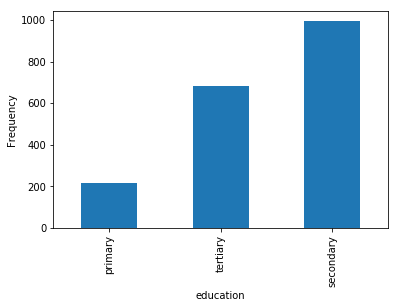

In [254]:
# check the distribution for attribute education
# Plotting bar chart for education.
frequency_table = df['education'].value_counts(ascending=True)
frequency_table.plot(kind='bar')
plt.xlabel('education')
plt.ylabel('Frequency')

In [255]:
# check if the distribution is shared equally across different categories
df['education'].value_counts()

secondary    995
tertiary     684
primary      217
Name: education, dtype: int64

In [256]:
# Above chart concludes that there are only three categories, The secondary and tertiary have high frequencies. so we 
# can safely fill the missing value with the preceding values

In [257]:
df['education'].fillna(method='ffill',inplace=True)

# check if all the missing values filled
df['education'].count()

2000

In [258]:
# check the distribution for attribute education to ensure that the values equally disctrbuted between different categories
df['education'].value_counts()

secondary    1045
tertiary      725
primary       230
Name: education, dtype: int64

Text(0,0.5,'Frequency')

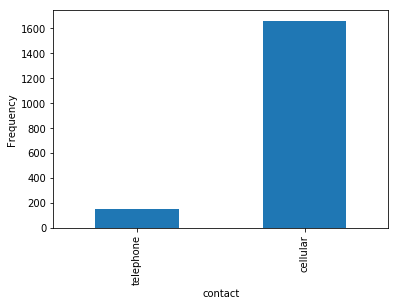

In [259]:
# check the distribution for attribute contact
# Plotting bar chart for education.
frequency_table = df['contact'].value_counts(ascending=True)
frequency_table.plot(kind='bar')
plt.xlabel('contact')
plt.ylabel('Frequency')

In [260]:
# check if the distribution is shared equally across different categories
df['contact'].value_counts()

cellular     1663
telephone     146
Name: contact, dtype: int64

In [261]:
# Almost 1663 samples have value 'cellular'. So safely the missing values can be filled with value 'cellular'
df['contact'].fillna('cellular',inplace=True)

# check if all the missing values filled
df['contact'].count()

2000

In [262]:
# check the distribution for attribute contact to ensure that the values equally disctrbuted between different categories
df['contact'].value_counts()

cellular     1854
telephone     146
Name: contact, dtype: int64

Text(0,0.5,'Frequency')

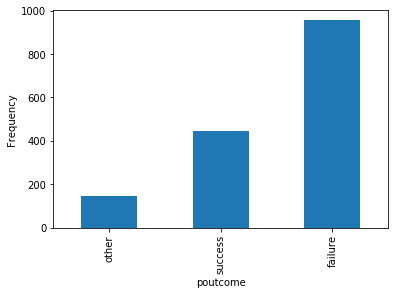

In [263]:
# check the distribution for attribute poutcome
# Plotting bar chart for education.
frequency_table = df['poutcome'].value_counts(ascending=True)
frequency_table.plot(kind='bar')
plt.xlabel('poutcome')
plt.ylabel('Frequency')

/usr/lib/python3.4/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,0.98,'')

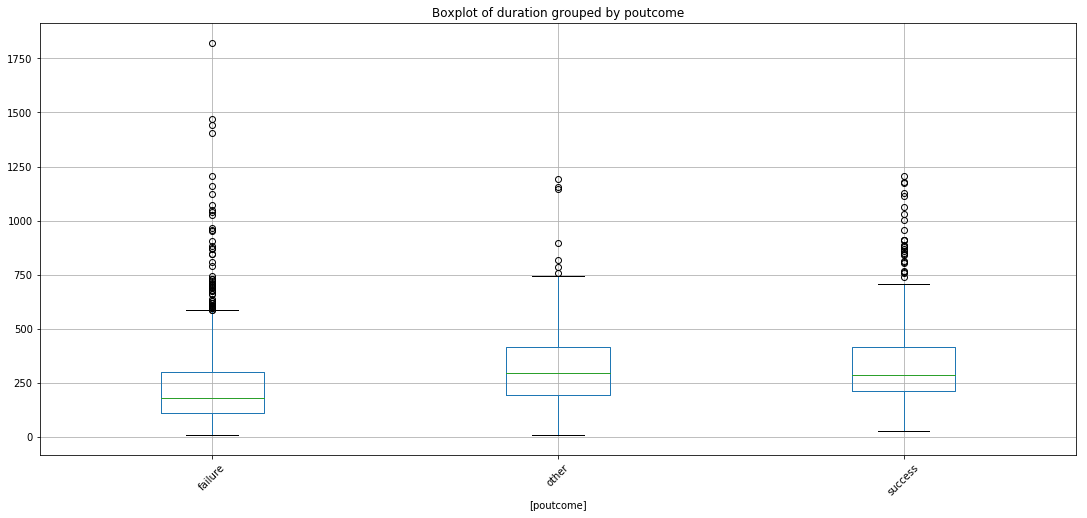

In [264]:
df.boxplot(column='duration', by=['poutcome'], rot=45, figsize=(18,8))
plt.title("Boxplot of duration grouped by poutcome")
# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("")

In [265]:
# check the distribution for attribute poutcome
df['poutcome'].value_counts()

failure    955
success    444
other      147
Name: poutcome, dtype: int64

In [266]:
# Above box plot concludes that the categories other and success have almost same median. Also from above bar chart it 
# is obvious that the categories failure and success have high frequencies.

# Key things to note down are as below,
# 1) The category "failure" falls mostly less than duration 300 except few outliers that are above 600
# 2) The duration above 750 can be abnormal so it is safer to consider this as category "other"
# 3) The rest of the missing fields that have netither duration below 300 or above 750 can be considered as category "success"

df['poutcome'].fillna(df[df['poutcome'].isnull()].apply(lambda row: 'failure' if row['duration'] < 300 else row['poutcome'],axis=1), inplace=True)

df['poutcome'].fillna(df[df['poutcome'].isnull()].apply(lambda row: 'other' if row['duration'] > 750 else row['poutcome'],axis=1), inplace=True)

df['poutcome'].fillna('success',inplace=True)

# check the distribution for attribute poutcome to ensure that the values equally disctrbuted between different categories
df['poutcome'].value_counts()

failure    1205
success     618
other       177
Name: poutcome, dtype: int64

# Task 2 - Decide on the treatment of outliers in the bank data set. 

In [ ]:
# Key numerical attributes that needs to be checked for outliers are balance and age which I am using in learning
# Lets check the distribution of these numerical attributes and also check in box plot for outliers.

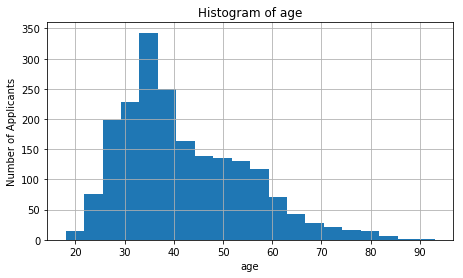

In [267]:
# Plot age
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of age")
ax1.set_xlabel('age')
ax1.set_ylabel('Number of Applicants')
df['age'].hist(bins=20)

Text(0.5,0.98,'')

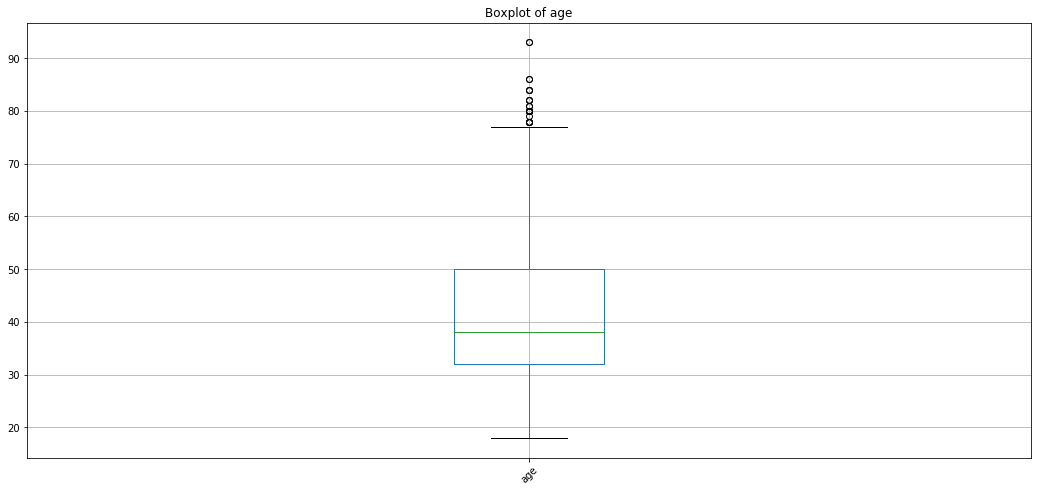

In [268]:
# plot age in box plot
df.boxplot(column='age', rot=45, figsize=(18,8))
plt.title("Boxplot of age")
# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("")

In [ ]:
# above bar chart and box plot concludes that thare are few outliers near the maximum range and 1 outlier above 90. These are possible values
# in the bank datasets. Hence no need to drop these samples that have outliers. Just we will use log transformation to arrive at
# normal distribution to help for learning and training data sets

In [271]:
# Use log transformation for normal distribution
df['age_normaldistributed'] = np.log(df['age'])

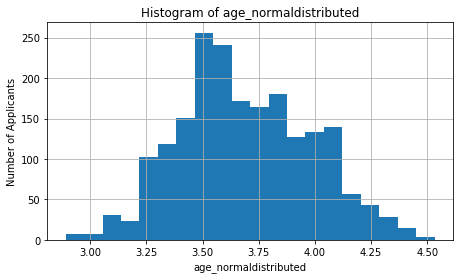

In [272]:
# Plot age that normally distributed
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of age_normaldistributed")
ax1.set_xlabel('age_normaldistributed')
ax1.set_ylabel('Number of Applicants')
df['age_normaldistributed'].hist(bins=20)

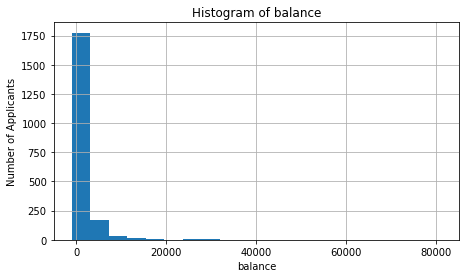

In [273]:
# Plot balance
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of balance")
ax1.set_xlabel('balance')
ax1.set_ylabel('Number of Applicants')
df['balance'].hist(bins=20)

Text(0.5,0.98,'')

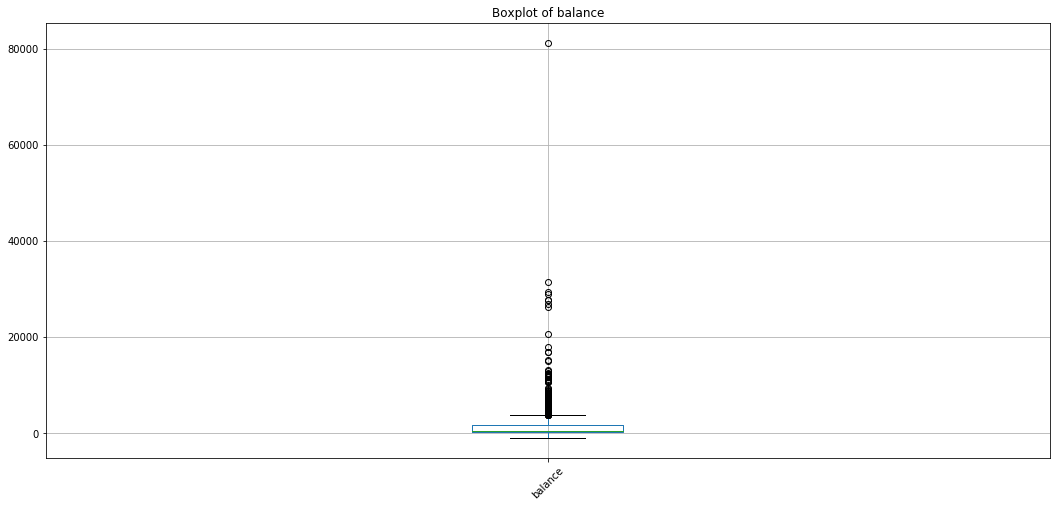

In [274]:
# plot balance in box plot
df.boxplot(column='balance', rot=45, figsize=(18,8))
plt.title("Boxplot of balance")
# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("")

In [285]:
# above bar chart and box plot concludes that thare are few outliers near the maximum range and 1 outlier above 80000. These are 
# possible values in the bank datasets. But there are few outliers that are less than 0, Obviously they are account with negative 
# balance or zero balance which could be manipulated and no need to drop these samples as we will miss other vital attributes in
# these samples. So the aim is to make the negative balance and zero balance to just balance with 100 and keep all the samples

df.loc[df.balance <= 0, 'balance'] = 100

Text(0.5,0.98,'')

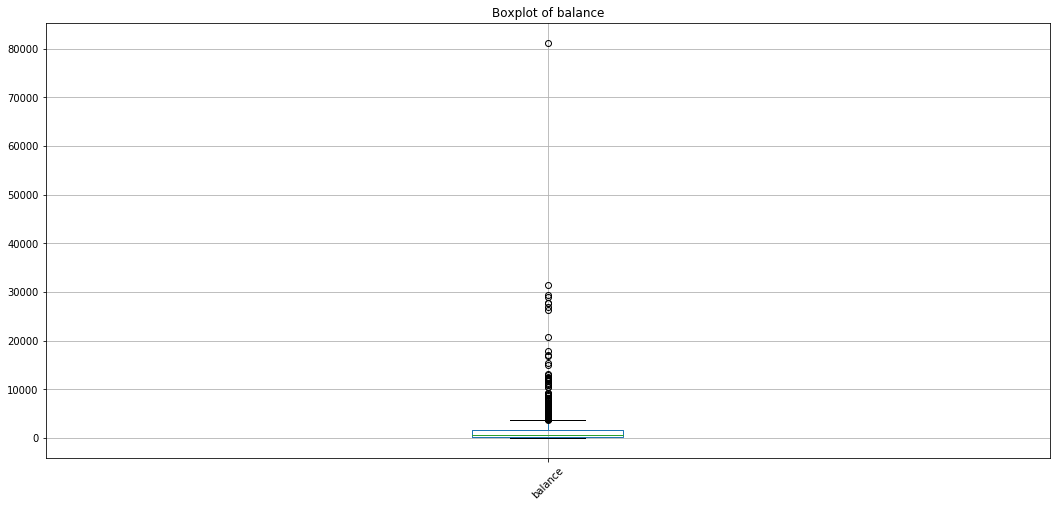

In [286]:
# plot balance in box plot to check that the minimum range (i.e. minimum whiskers) starts near 100
df.boxplot(column='balance', rot=45, figsize=(18,8))
plt.title("Boxplot of balance")
# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("")

In [ ]:
# Outliers manipulated above, now use log transformation to arrive at normal distribution to help for learning and 
# training data sets

In [287]:
# Use log transformation for normal distribution
df['balance_normaldistributed'] = np.log(df['balance'])

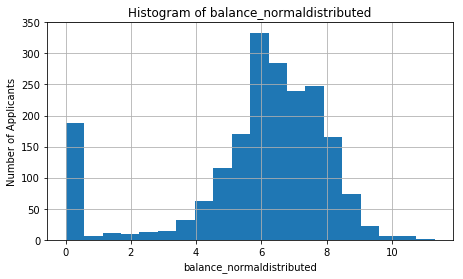

In [288]:
# Plot balance that normally distributed
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of balance_normaldistributed")
ax1.set_xlabel('balance_normaldistributed')
ax1.set_ylabel('Number of Applicants')
df['balance_normaldistributed'].hist(bins=20)

# Task 3 - Suggest the creation of at least one new feature from the existing ones and justify the usefulness of your choice

In [289]:
# Create new column agevsbalance_ratio. This ratio will ideally show the relationship between numerical attributes age and 
# balance that could add additional value in addition to age and balance to predict the existing loan in an account
df['agevsbalance_ratio'] = df['balance'] / df['age']

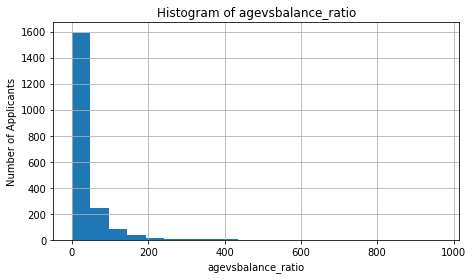

In [290]:
# Plot new column agevsbalance_ratio 
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of agevsbalance_ratio")
ax1.set_xlabel('agevsbalance_ratio')
ax1.set_ylabel('Number of Applicants')
df['agevsbalance_ratio'].hist(bins=20)

In [295]:
# New feature created above, now use log transformation to arrive at normal distribution to help for learning and 
# training data sets
df['agevsbalance_ratio_log'] = np.log(df['agevsbalance_ratio'])

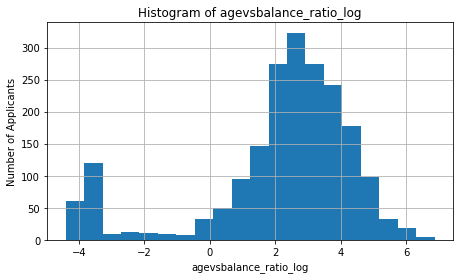

In [296]:
# Plot new column agevsbalance_ratio that normally distributed
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of agevsbalance_ratio_log")
ax1.set_xlabel('agevsbalance_ratio_log')
ax1.set_ylabel('Number of Applicants')
df['agevsbalance_ratio_log'].hist(bins=20)

# Task 4 - Using the dataset you prepared, perform a classification on the data using scikitlearn’s logistic regression. plot the Hoeffding bound and the VC bound and check whether or not either bound is exceeded

# Task 5 - Using the dataset, make learning curves for logistic regression and two other machine learning algorithms of your choosing using scikitlearn’s learning_curve functionality

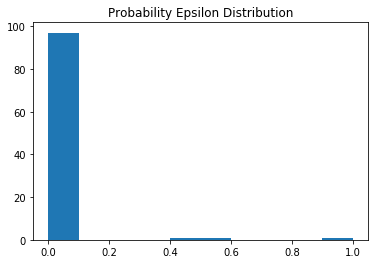

In [44]:
plt.hist(prob_epsilon)
plt.title('Probability Epsilon Distribution')
plt.show()

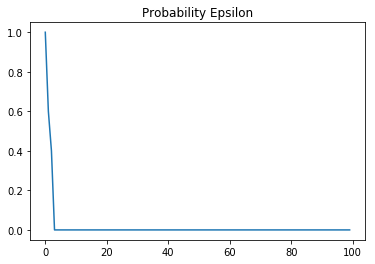

In [45]:
plt.plot(prob_epsilon)
plt.title('Probability Epsilon')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

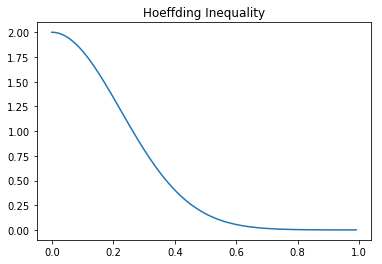

In [49]:
N = 5
plt.figure()
plt.plot(epsilons, [2*math.exp(-2*e**2*N) for e in epsilons])
plt.title('Hoeffding Inequality')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

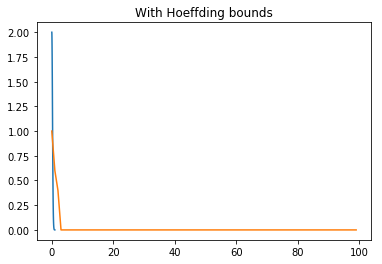

In [50]:
plt.figure()
plt.plot(epsilons, [2*math.exp(-2*e**2*N) for e in epsilons])
plt.plot(prob_epsilon)
plt.title('With Hoeffding bounds')
plt.show